In [11]:
import os
import shutil
import glob

In [12]:
mainDir = 'C:/Users/USER/Desktop/CRACK_DETECTION/crack_detection/crack_detection_dataset/crack_detection_dataset_1'

In [13]:
crack_images = os.listdir(mainDir+'/crack')
print('total number of images of concrete with cracks are : ', len(crack_images))

total number of images of concrete with cracks are :  960


In [14]:
import os
print(os.path.exists(mainDir))  # Should return True if the folder exists


True


In [15]:
uncrack_images = os.listdir(mainDir+'/no_crack')
print('total number of images of concrete without cracks are : ', len(uncrack_images))

total number of images of concrete without cracks are :  1190


## Let's visualize the images

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
%matplotlib inline

***************Images of concrete with cracks**********************


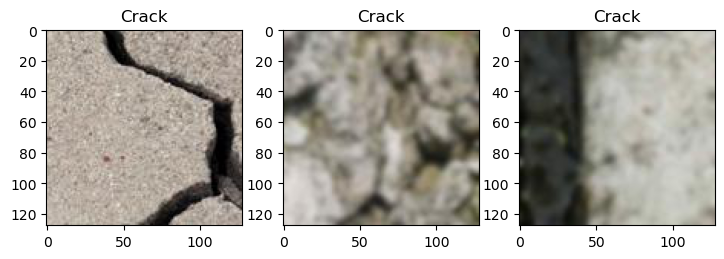

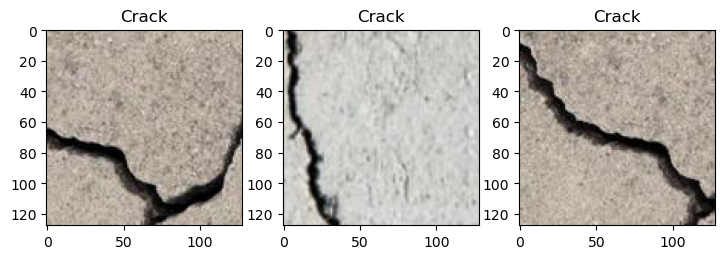

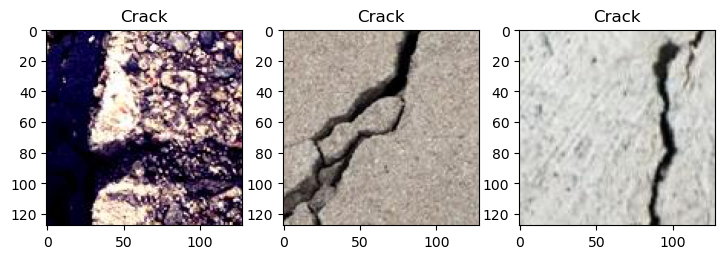

In [17]:
##Displaying images with crack
random_crack_images_indices = np.random.randint(0, len(crack_images), 9)
random_crack_images = [crack_images[index] for index in random_crack_images_indices]
print('***************Images of concrete with cracks**********************')
imindex = 0
for i in range(3):
    fig = plt.figure(figsize=(30, 30))
    for j in range(3):
        axisarr = fig.add_subplot(10, 10, j+1)
        axisarr.imshow(mpimg.imread(os.path.join(mainDir, 'crack', random_crack_images[imindex])))
        axisarr.set_title('Crack')
        imindex += 1
plt.show()

***************Images of concrete without cracks**********************


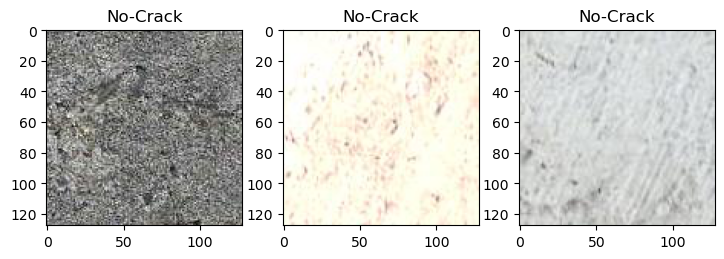

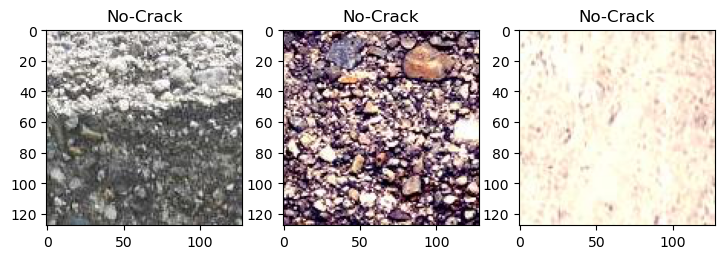

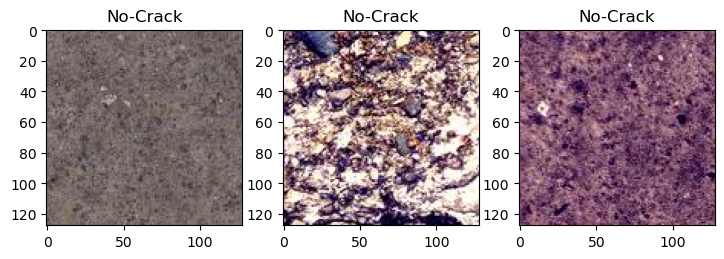

In [18]:
##Displaying images without crack
random_uncrack_images_indices = np.random.randint(0, len(uncrack_images), 9)
random_uncrack_images = [uncrack_images[index] for index in random_uncrack_images_indices]
print('***************Images of concrete without cracks**********************')
imindex = 0
for i in range(3):
    fig = plt.figure(figsize=(30, 30))
    for j in range(3):
        axisarr = fig.add_subplot(10, 10, j+1)
        axisarr.imshow(mpimg.imread(os.path.join(mainDir, 'no_crack', random_uncrack_images[imindex])))
        axisarr.set_title('No-Crack')
        imindex += 1
plt.show()

In [19]:
#first we will create folders and will store total 8K images(4K images with crack and 4K images without crack)
os.mkdir('data_8k')
os.mkdir('data_8k/train')
os.mkdir('data_8k/test')
os.mkdir('data_8k/validation')
os.mkdir('data_8k/visualization')
os.mkdir('data_8k/visualization/real_images')

os.mkdir('data_8k/train/crack')
os.mkdir('data_8k/train/uncrack')
os.mkdir('data_8k/test/crack')
os.mkdir('data_8k/test/uncrack')
os.mkdir('data_8k/validation/crack')
os.mkdir('data_8k/validation/uncrack')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'data_8k'

In [20]:
crack_images_path = [os.path.join(mainDir, 'crack', image) for image in crack_images]
uncrack_images_path = [os.path.join(mainDir, 'no_crack', image) for image in uncrack_images]

In [21]:
#lets shuffle these images
import random
random.shuffle(crack_images_path)
random.shuffle(uncrack_images_path)

In [22]:
#now since the crack and uncrack images list is shuffled, let's choose first 4K images from crack and uncrack images
first_4K_crack_images_path = crack_images_path[0:960]
first_4K_uncrack_images_path = uncrack_images_path[0:1160]

In [23]:
print(len(first_4K_crack_images_path), len(first_4K_uncrack_images_path))

960 1160


In [24]:
# Define the split ratios
train_ratio = 0.70
test_ratio = 0.15
validation_ratio = 0.125  
visualization_ratio = 0.025  

# Total number of images in each category
total_crack_images = len(first_4K_crack_images_path)
total_uncrack_images = len(first_4K_uncrack_images_path)

# Calculate the split indices dynamically
def split_dataset(dataset, train_ratio, test_ratio, validation_ratio, visualization_ratio):
    train_end = int(len(dataset) * train_ratio)
    test_end = train_end + int(len(dataset) * test_ratio)
    validation_end = test_end + int(len(dataset) * validation_ratio)
    visualization_end = validation_end + int(len(dataset) * visualization_ratio)

    train_set = dataset[:train_end]
    test_set = dataset[train_end:test_end]
    validation_set = dataset[test_end:validation_end]
    visualization_set = dataset[validation_end:visualization_end]

    return train_set, test_set, validation_set, visualization_set

# Apply the split function to both categories
train_crack, test_crack, validation_crack, visualization_crack = split_dataset(
    first_4K_crack_images_path, train_ratio, test_ratio, validation_ratio, visualization_ratio
)

train_uncrack, test_uncrack, validation_uncrack, visualization_uncrack = split_dataset(
    first_4K_uncrack_images_path, train_ratio, test_ratio, validation_ratio, visualization_ratio
)

# Print the number of images in each category to verify
print(f"Crack Images - Train: {len(train_crack)}, Test: {len(test_crack)}, Validation: {len(validation_crack)}, Visualization: {len(visualization_crack)}")
print(f"Uncrack Images - Train: {len(train_uncrack)}, Test: {len(test_uncrack)}, Validation: {len(validation_uncrack)}, Visualization: {len(visualization_uncrack)}")


Crack Images - Train: 672, Test: 144, Validation: 120, Visualization: 24
Uncrack Images - Train: 812, Test: 174, Validation: 145, Visualization: 29


In [25]:
import os
import shutil

# Define the base directory
base_dir = "C:/Users/USER/Desktop/CRACK_DETECTION/crack_detection/crack_detection_dataset/crack_detection_dataset_1"
# Define category names
categories = ["crack", "uncrack"]
splits = ["train", "test", "validation", "visualization"]

# Create subdirectories
for split in splits:
    for category in categories:
        os.makedirs(os.path.join(base_dir, split, category), exist_ok=True)

# Function to move images into respective folders
def save_images(image_list, destination_folder):
    for image_path in image_list:
        # Extract image filename
        image_filename = os.path.basename(image_path)
        # Destination path
        dest_path = os.path.join(destination_folder, image_filename)
        # Move image
        shutil.move(image_path, dest_path)

# Save images into respective folders
save_images(train_crack, os.path.join(base_dir, "train", "crack"))
save_images(test_crack, os.path.join(base_dir, "test", "crack"))
save_images(validation_crack, os.path.join(base_dir, "validation", "crack"))
save_images(visualization_crack, os.path.join(base_dir, "visualization", "crack"))

save_images(train_uncrack, os.path.join(base_dir, "train", "uncrack"))
save_images(test_uncrack, os.path.join(base_dir, "test", "uncrack"))
save_images(validation_uncrack, os.path.join(base_dir, "validation", "uncrack"))
save_images(visualization_uncrack, os.path.join(base_dir, "visualization", "uncrack"))

print("Images successfully moved into respective folders!")


Images successfully moved into respective folders!


In [26]:
# Define the split ratios
train_ratio = 0.70
test_ratio = 0.15
validation_ratio = 0.125  # 12.5%
visualization_ratio = 0.025  # 2.5%

# Function to split dataset dynamically
def split_dataset(dataset, train_ratio, test_ratio, validation_ratio, visualization_ratio):
    train_end = int(len(dataset) * train_ratio)
    test_end = train_end + int(len(dataset) * test_ratio)
    validation_end = test_end + int(len(dataset) * validation_ratio)
    visualization_end = validation_end + int(len(dataset) * visualization_ratio)

    train_set = dataset[:train_end]
    test_set = dataset[train_end:test_end]
    validation_set = dataset[test_end:validation_end]
    visualization_set = dataset[validation_end:visualization_end]

    return train_set, test_set, validation_set, visualization_set

# Apply split to Uncrack Images
train_uncrack, test_uncrack, validation_uncrack, visualization_uncrack = split_dataset(
    first_4K_uncrack_images_path, train_ratio, test_ratio, validation_ratio, visualization_ratio
)

# Print verification
print(f"Uncrack Images - Train: {len(train_uncrack)}, Test: {len(test_uncrack)}, Validation: {len(validation_uncrack)}, Visualization: {len(visualization_uncrack)}")


Uncrack Images - Train: 812, Test: 174, Validation: 145, Visualization: 29


### LeNet - 5 CNN Model for 8K images

In [6]:
!pip install tensorflow keras


  Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl (375.9 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\USER\\anaconda3\\Lib\\site-packages\\tensorflow\\python\\_pywrap_py_exception_registry.pyd'
Consider using the `--user` option or check the permissions.



In [12]:
!pip uninstall tensorflow keras -y
!pip install tensorflow keras --upgrade


Found existing installation: keras 3.9.1
Uninstalling keras-3.9.1:
  Successfully uninstalled keras-3.9.1


  Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl (375.9 MB)
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.3 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.3 MB 1.2 MB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.3 MB 1.2 MB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.3 MB 1.2 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 1.2 MB/s eta 0:00:00


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\USER\\anaconda3\\Lib\\site-packages\\tensorflow\\python\\_pywrap_py_exception_registry.pyd'
Consider using the `--user` option or check the permissions.



In [2]:
#import keras and different type of layers for for defining CNN models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.metrics import Precision, Recall

In [3]:
lenetModel = Sequential()
lenetModel.add(Conv2D(6, (5, 5), strides=(1, 1), padding='valid', input_shape=(227, 227, 3)))
lenetModel.add(Activation('relu'))
lenetModel.add(AveragePooling2D(pool_size=(2, 2), strides=(2,2)))

lenetModel.add(Conv2D(16, (5, 5), padding='valid'))
lenetModel.add(Activation('relu'))
lenetModel.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

lenetModel.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
lenetModel.add(Dense(120))
lenetModel.add(Activation('relu'))
lenetModel.add(Dense(units=84))
lenetModel.add(Activation('relu'))

lenetModel.add(Dense(1)) # this our output layer (since this is binary classification of cracked or uncracked, we use only one unit in output layer).
lenetModel.add(Activation('sigmoid'))

lenetModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall()])
lenetModel.summary()

C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 223, 223, 6)         │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 223, 223, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 111, 111, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 107, 107, 16)        │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 107, 107, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 53, 53, 16)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 44944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │       5,393,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 84)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              85 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,406,521 (20.62 MB)

 Trainable params: 5,406,521 (20.62 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
lenetModel.save_weights("lenetModelWeights_8K.weights.h5")



In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 32

# this is the augmentation configuration we will use for training
#here along with rescaling, we are also changing the orientation of the image in only training dataset, 
#this is we are doing so that our model never sees the same image, and this will help in fighting overfitting.
train_datagen_8K = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing, validation, visualization:
# only rescaling
test_datagen_8K = ImageDataGenerator(rescale=1./255)
validation_datagen_8K = ImageDataGenerator(rescale=1./255)
visualization_datagen_8K = ImageDataGenerator(rescale=1./255)


train_generator_8K = train_datagen_8K.flow_from_directory(
        'data_8k/train',  # this is the target directory
        target_size=(227, 227),  # all images will be resized to 227*227
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for test data
test_generator_8K = test_datagen_8K.flow_from_directory(
        'data_8k/test',
        target_size=(227, 227),
        batch_size=batch_size,
        class_mode='binary')

# this is a similar generator, for validation data
validation_generator_8K = validation_datagen_8K.flow_from_directory(
        'data_8k/validation',
        target_size=(227, 227),
        batch_size=batch_size,
        class_mode='binary')

# this is a similar generator, for visualization data
visualization_generator_8K = visualization_datagen_8K.flow_from_directory(
        'data_8k/visualization',
        target_size=(227, 227),
        batch_size=batch_size,
        class_mode='binary')

Found 1845 images belonging to 2 classes.
Found 319 images belonging to 2 classes.
Found 288 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


In [17]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', patience=4, min_delta=0.01)

In [67]:
import time
start_time = time.time() 
lenetModel.fit(
    train_generator_8K,
    epochs=10,
    validation_data=validation_generator_8K,
    callbacks=[es]
)

finish_time = time.time()
time_taken = finish_time-start_time
print('\n')
print('Training complete in {:.0f}m {:.0f}s'.format(time_taken // 60, time_taken % 60))

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 481ms/step - accuracy: 0.9227 - loss: 0.1948 - precision: 0.8905 - recall: 0.9480 - val_accuracy: 0.9549 - val_loss: 0.1538 - val_precision: 0.9925 - val_recall: 0.9172
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 31s 526ms/step - accuracy: 0.9308 - loss: 0.1819 - precision: 0.9091 - recall: 0.9463 - val_accuracy: 0.9722 - val_loss: 0.1076 - val_precision: 0.9724 - val_recall: 0.9724
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 30s 509ms/step - accuracy: 0.9406 - loss: 0.1674 - precision: 0.9176 - recall: 0.9620 - val_accuracy: 0.9722 - val_loss: 0.0876 - val_precision: 0.9597 - val_recall: 0.9862
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 27s 459ms/step - accuracy: 0.9568 - loss: 0.1327 - precision: 0.9397 - recall: 0.9727 - val_accuracy: 0.9757 - val_loss: 0.0861 - val_precision: 0.9600 - val_recall: 0.9931
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 27s 473ms/step - accuracy: 0.9486 - loss: 0.1437 - precision: 0.9262 - recall: 0.9691 - val_accuracy: 0.9306 - val_los

In [21]:
test_loss_8K, accuracy_8K, precision_8K, recall_8K = lenetModel.evaluate(test_generator_8K)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.9033 - loss: 0.2243 - precision: 0.9194 - recall: 0.8970


In [22]:
print(' accuracy_8K : ', accuracy_8K, '\n', 'precision_8K : ', precision_8K, '\n', 'recall_8K : ', recall_8K)

 accuracy_8K :  0.9216300845146179 
 precision_8K :  0.9408283829689026 
 recall_8K :  0.9137930870056152


In [6]:
lenetModel.save("lenetModel_8K.h5")  # Save the entire model


In [7]:
from tensorflow.keras.models import load_model

# Load the trained model from the .h5 file
lenetModel = load_model("lenetModel_8K.h5")


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import cv2
import os
import numpy as np

# Define the Segmentation LeNet Model
class SegmentedLeNet(nn.Module):
    def __init__(self):
        super(SegmentedLeNet, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(16, 6, kernel_size=5, stride=2, padding=2, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(6, 1, kernel_size=5, stride=2, padding=2, output_padding=1),
            nn.Sigmoid()  # Output is a probability mask
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x



In [3]:
# Custom Dataset Loader
class CrackSegmentationDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.image_list = os.listdir(image_dir)

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_list[idx])
        mask_path = os.path.join(self.mask_dir, self.image_list[idx])

        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        image = cv2.resize(image, (32, 32))
        mask = cv2.resize(mask, (32, 32))

        image = np.expand_dims(image, axis=0) / 255.0
        mask = np.expand_dims(mask, axis=0) / 255.0

        return torch.tensor(image, dtype=torch.float32), torch.tensor(mask, dtype=torch.float32)

# Define Paths
image_dir = "C:/Users/USER/Desktop/CRACK_DETECTION/crack_detection/Crack_Segmentation_Dataset/images"
mask_dir = "C:/Users/USER/Desktop/CRACK_DETECTION/crack_detection/Crack_Segmentation_Dataset/masks"

# Data Loading
dataset = CrackSegmentationDataset(image_dir, mask_dir)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

# Initialize Model
model = SegmentedLeNet()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
num_epochs = 10
for epoch in range(num_epochs):
    for images, masks in dataloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Save Model
torch.save(model.state_dict(), "segmented_lenet.pth")


Epoch [1/10], Loss: 0.1852
Epoch [2/10], Loss: 0.1809
Epoch [3/10], Loss: 0.0572
Epoch [4/10], Loss: 0.1183
Epoch [5/10], Loss: 0.0902
Epoch [6/10], Loss: 0.2052
Epoch [7/10], Loss: 0.1716
Epoch [8/10], Loss: 0.1039
Epoch [9/10], Loss: 0.1002
Epoch [10/10], Loss: 0.5466


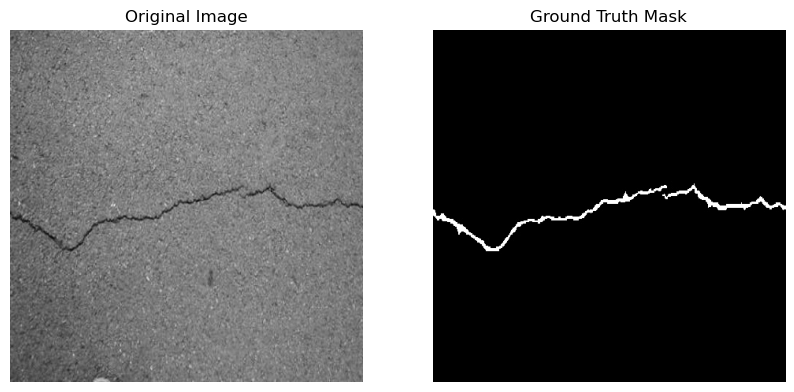

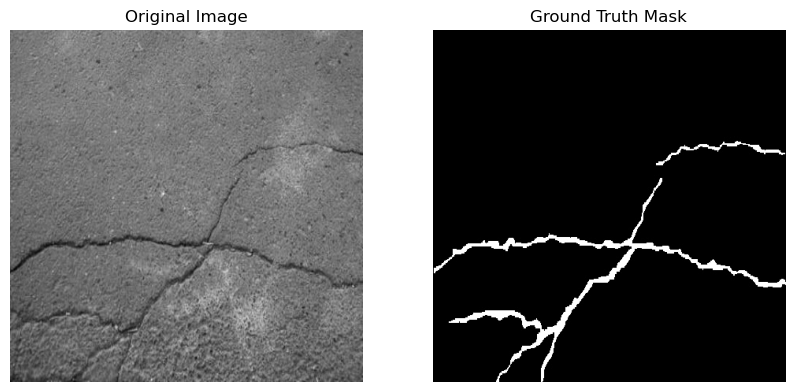

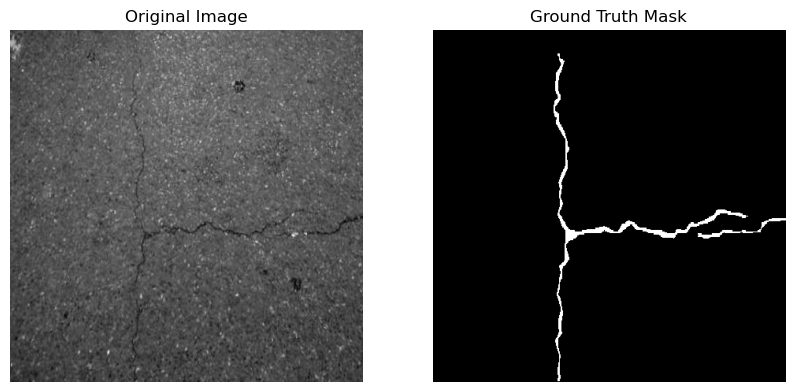

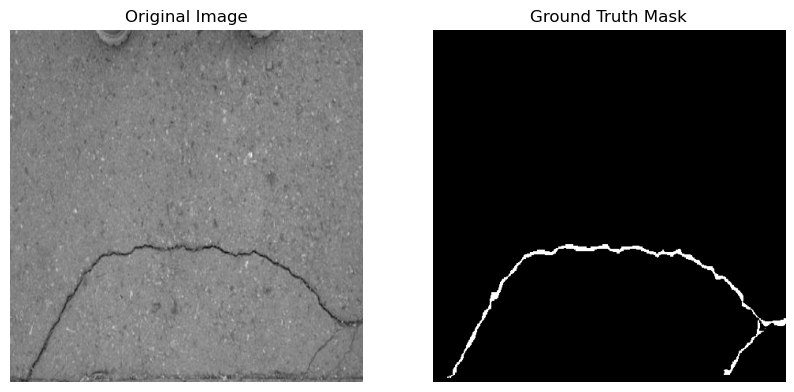

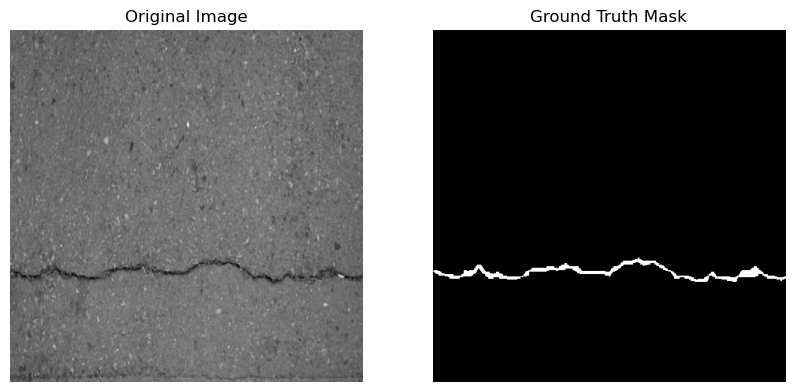

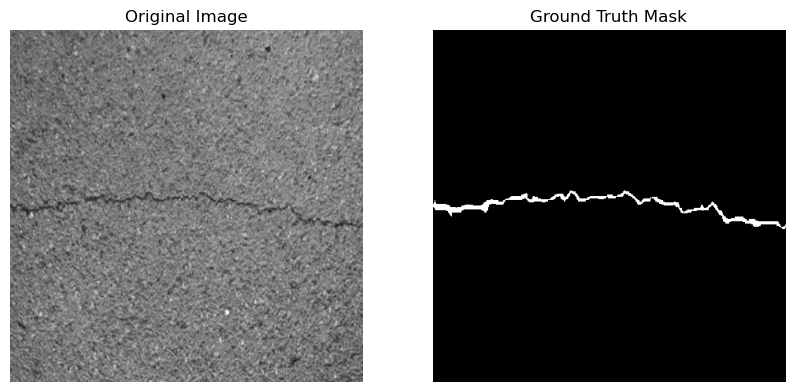

In [4]:
import cv2
import os
import matplotlib.pyplot as plt

# Define dataset paths
image_dir = "C:/Users/USER/Desktop/CRACK_DETECTION/crack_detection/Crack_Segmentation_Dataset/images"
mask_dir = "C:/Users/USER/Desktop/CRACK_DETECTION/crack_detection/Crack_Segmentation_Dataset/masks"

# Get list of image files (assuming masks have the same filenames)
image_files = sorted(os.listdir(image_dir))

# Display images and masks side by side
for filename in image_files[:6]:  # Display first 6 pairs
    image_path = os.path.join(image_dir, filename)
    mask_path = os.path.join(mask_dir, filename)  # Ensure filenames match

    # Load image and mask
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Resize mask to match image size (if needed)
    mask = cv2.resize(mask, (image.shape[1], image.shape[0]))

    # Plot side by side
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    ax[0].imshow(image, cmap="gray")
    ax[0].set_title("Original Image")
    ax[0].axis("off")

    ax[1].imshow(mask, cmap="gray")
    ax[1].set_title("Ground Truth Mask")
    ax[1].axis("off")

    plt.show()


### VISUALISING PREDICTIONS OF LENET MODEL TRAINED ON 8K IMAGES

In [8]:
def generate():
    global visualization_generator_8K  # Make it global
    visualization_generator_8K = some_function()

imgarr_8K = visualization_generator_8K[0][0]
imgarr_8K.shape


(32, 227, 227, 3)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


predictions = lenetModel.predict(imgarr_8K)
pred_class_arr = np.array(predictions).round()
counter = 0
for i in range(2):
    fig = plt.figure(figsize=(50, 50))
    for j in range(5):
        axisarr = fig.add_subplot(10, 10, j+1)
        axisarr.imshow(imgarr_8K[counter])
        if(pred_class_arr[counter] == 0):
            axisarr.set_title('Crack')
        else:
            axisarr.set_title('Not Crack')
        counter += 1

#### Highlighting Cracks with Red colour

In [52]:
random_image_path = "C:/Users/USER/Desktop/CRACK_DETECTION/istockphoto-1080117220-612x612.jpg"

In [53]:
def highlight_cracks(im, model):
    output_image = np.zeros_like(im)
    a = 0
    for i in range(12):
        k = 0
        for j in range(12):
            p = im[a:a+100, k:k+100]
            resizeIm = cv2.resize(p, (227, 227))
            im_arr = np.zeros((1, 227, 227, 3))
            im_arr[0] = resizeIm
            pred = model.predict(im_arr)
            prediction = np.array(pred).round()
            if(prediction == 0):
                color = (255, 26, 26)
            else:
                color = (153, 255, 153)
            b = np.zeros_like(p, dtype=np.uint8)
            b[:] = color
            add_img = cv2.addWeighted(p, 0.83, b, 0.17, 0)
            output_image[a:a+100, k:k+100] = add_img
            k += 100
        a += 100
    return output_image

In [54]:
print(random_image_path)


C:/Users/USER/Desktop/CRACK_DETECTION/istockphoto-1080117220-612x612.jpg


In [55]:
import os
print(os.path.exists(random_image_path))



True


In [69]:


def highlight_cracks(im, model):
    output_image = np.zeros_like(im)
    a = 0
    for i in range(12):
        k = 0
        for j in range(12):
            p = im[a:a+100, k:k+100]
            resizeIm = cv2.resize(p, (227, 227))
            im_arr = np.zeros((1, 227, 227, 3))
            im_arr[0] = resizeIm
            pred = model.predict(im_arr)
            prediction = np.array(pred).round()
            if(prediction == 0):
                color = (255, 26, 26)
            else:
                color = (153, 255, 153)
            b = np.zeros_like(p, dtype=np.uint8)
            b[:] = color
            add_img = cv2.addWeighted(p, 0.83, b, 0.17, 0)
            output_image[a:a+100, k:k+100] = add_img
            k += 100
        a += 100
    return output_image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━

Text(0.5, 1.0, 'Crack Highlighted Image')

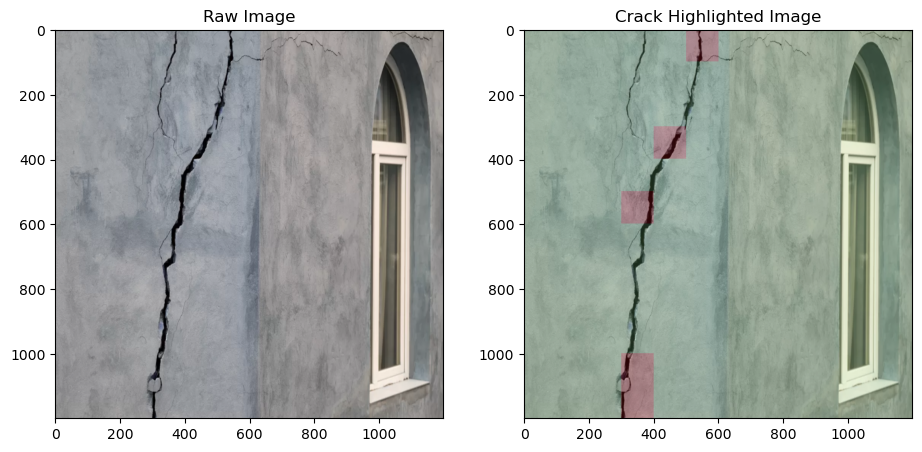

In [70]:

im = cv2.imread(random_image_path)
im = cv2.resize(im, (1200, 1200))
crack_highlighted_image = highlight_cracks(im, lenetModel)


Text(0.5, 1.0, 'Crack Highlighted Image')

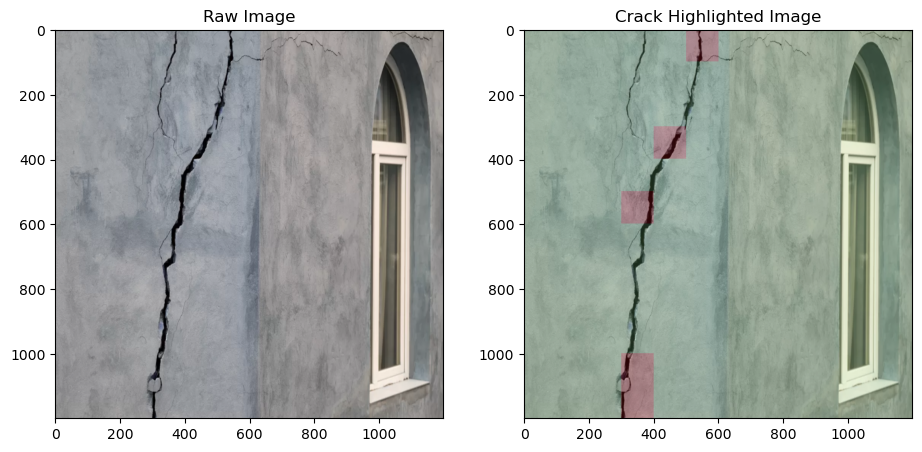

In [72]:
fig = plt.figure(figsize=(120, 120))
axisarr = fig.add_subplot(20, 20, 1)
axisarr.imshow(im)
axisarr.set_title('Raw Image')

axisarr = fig.add_subplot(20, 20, 2)
axisarr.imshow(crack_highlighted_image)
axisarr.set_title('Crack Highlighted Image')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 

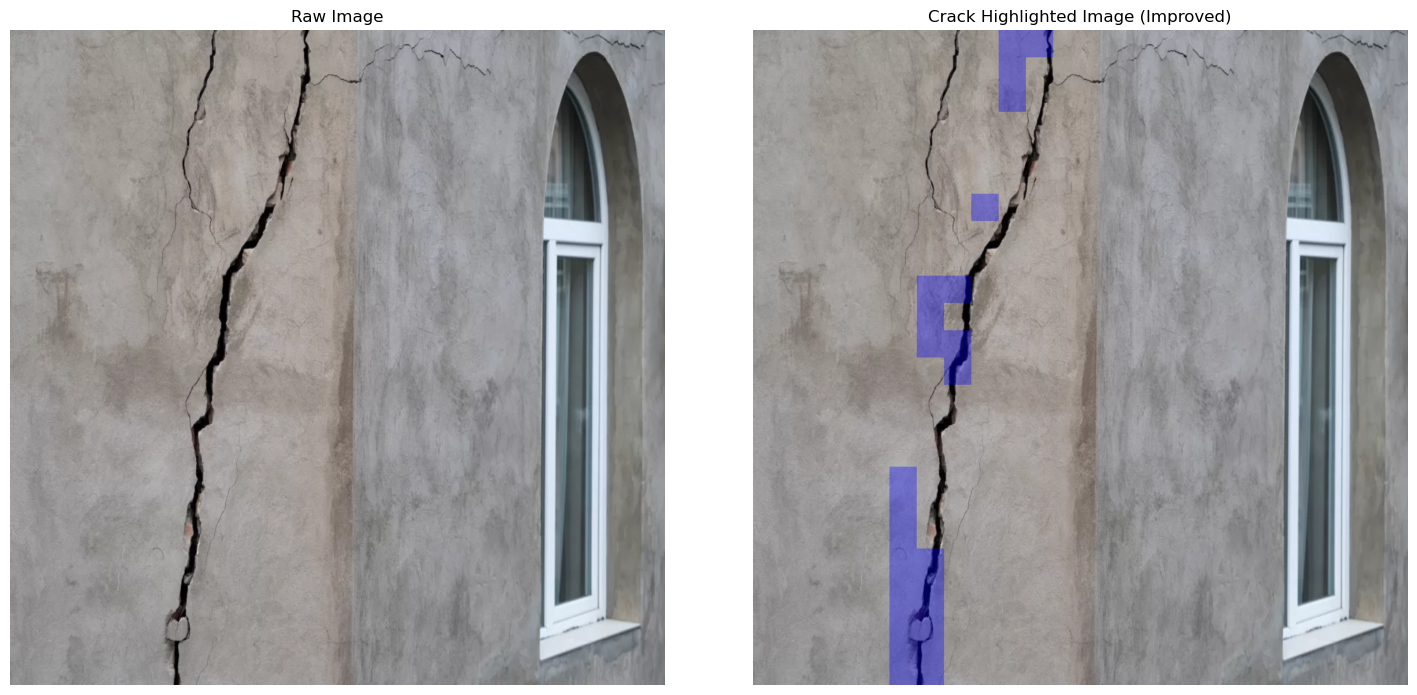

In [76]:
def highlight_cracks_improved(im, model):
    """
    Highlights potential cracks in the image by processing smaller overlapping patches
    and using a more sensitive highlighting approach.

    Args:
        im (numpy.ndarray): The input image.
        model: The trained crack detection model.

    Returns:
        numpy.ndarray: The image with potential cracks highlighted.
    """
    output_image = np.zeros_like(im)
    patch_size = 100
    overlap = 50  # Introduce overlap for better detection at patch boundaries
    highlight_color = (255, 0, 0)  # Red color for highlighting
    alpha_crack = 0.35  # Increased alpha for more visible cracks
    alpha_original = 0.65

    for y in range(0, im.shape[0] - patch_size + 1, patch_size - overlap):
        for x in range(0, im.shape[1] - patch_size + 1, patch_size - overlap):
            # Extract the patch
            patch = im[y:y + patch_size, x:x + patch_size]

            # Resize the patch to the model's input size
            resizeIm = cv2.resize(patch, (227, 227))
            im_arr = np.expand_dims(resizeIm, axis=0)

            # Predict using the model
            pred = model.predict(im_arr)
            prediction = np.array(pred).round()

            # If a crack is detected, highlight the original patch in the output image
            if prediction == 0:  # Assuming 0 represents a crack
                # Create a colored overlay for the crack
                overlay = np.zeros_like(patch, dtype=np.uint8)
                overlay[:] = highlight_color

                # Blend the overlay with the original patch
                blended_patch = cv2.addWeighted(patch, alpha_original, overlay, alpha_crack, 0)
                output_image[y:y + patch_size, x:x + patch_size] = blended_patch
            else:
                # If no crack, just copy the original patch
                output_image[y:y + patch_size, x:x + patch_size] = patch

    return output_image

# Load the image
random_image_path = "C:/Users/USER/Desktop/CRACK_DETECTION/istockphoto-1080117220-612x612.jpg"
im = cv2.imread(random_image_path)
if im is None:
    print(f"Error: Could not read image from {random_image_path}")
    exit()
im = cv2.resize(im, (1200, 1200))

# Highlight cracks using the improved function
crack_highlighted_image = highlight_cracks_improved(im, lenetModel)

# Display the images
fig = plt.figure(figsize=(15, 7))  # Adjusted figure size for better viewing
axisarr = fig.add_subplot(1, 2, 1)
axisarr.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
axisarr.set_title('Raw Image')
axisarr.axis('off')

axisarr = fig.add_subplot(1, 2, 2)
axisarr.imshow(cv2.cvtColor(crack_highlighted_image, cv2.COLOR_BGR2RGB))
axisarr.set_title('Crack Highlighted Image (Improved)')
axisarr.axis('off')

plt.tight_layout()
plt.show()

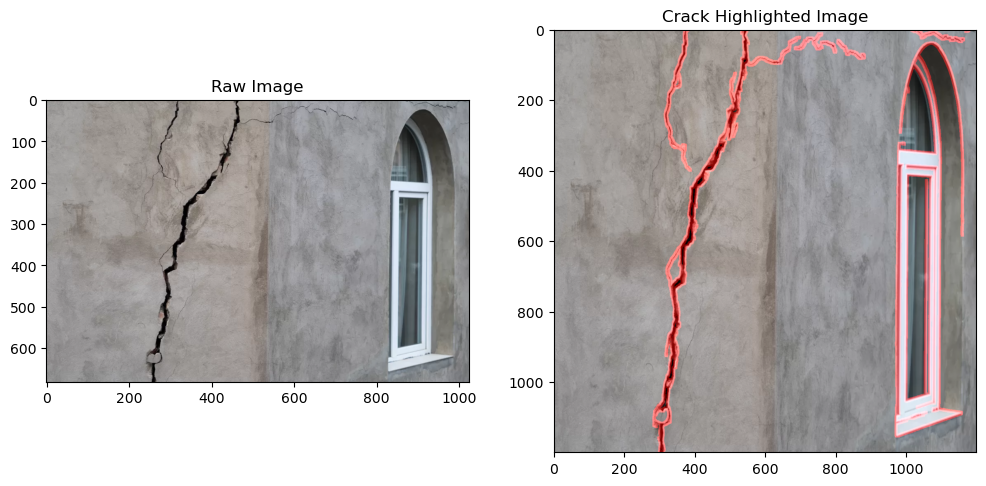

In [13]:
import cv2
import matplotlib.pyplot as plt

def highlight_cracks(image_path):

    im = cv2.imread(image_path)
    if im is None:
        print(f"Error: Could not read image at path: {image_path}")
        return None

    im = cv2.resize(im, (1200, 1200))

    # Convert to grayscale
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use Canny edge detection to find edges
    edges = cv2.Canny(blurred, 50, 150)

    # Dilate the edges to make cracks more visible
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    dilated_edges = cv2.dilate(edges, kernel, iterations=2)

    # Create a mask from the dilated edges
    mask = dilated_edges

    # Invert the mask (cracks will be white)
    mask_inv = cv2.bitwise_not(mask)

    # Create a red overlay for the cracks
    red_overlay = im.copy()
    red_overlay[:] = (0, 0, 255)  # BGR for red

    # Use the mask to color the crack regions red in the original image
    highlighted_image = cv2.bitwise_and(red_overlay, red_overlay, mask=mask)
    highlighted_image = cv2.addWeighted(im, 1, highlighted_image, 0.5, 0)

    return highlighted_image

# Path to your image file
image_path = "C:/Users/USER/Desktop/CRACK_DETECTION/istockphoto-1080117220-612x612.jpg"  # Replace with the actual path to your image

# Highlight the cracks
crack_highlighted_image = highlight_cracks(image_path)

if crack_highlighted_image is not None:
    # Display the original and highlighted images
    fig = plt.figure(figsize=(12, 12))

    axisarr = fig.add_subplot(1, 2, 1)
    axisarr.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    axisarr.set_title('Raw Image')

    axisarr = fig.add_subplot(1, 2, 2)
    axisarr.imshow(cv2.cvtColor(crack_highlighted_image, cv2.COLOR_BGR2RGB))
    axisarr.set_title('Crack Highlighted Image')

    plt.show()

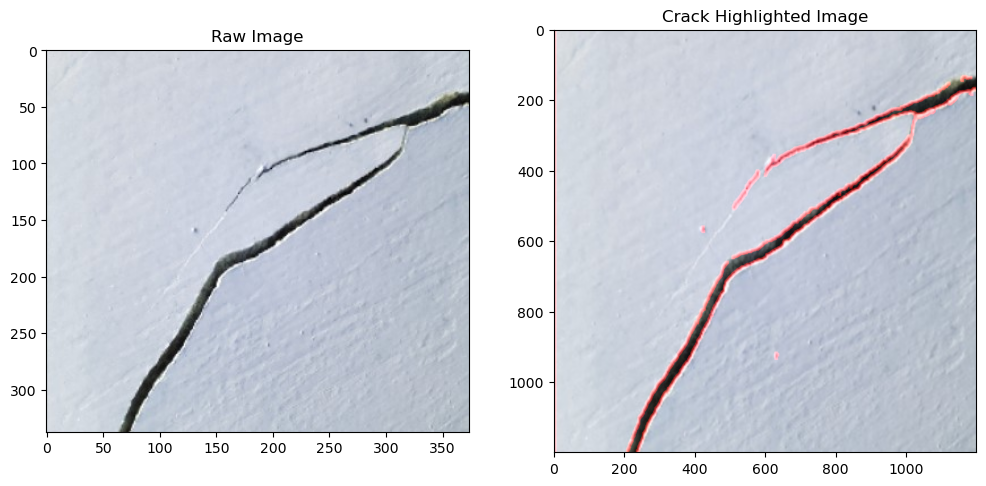

In [11]:
import cv2
import matplotlib.pyplot as plt

def highlight_cracks(image_path):

    im = cv2.imread(image_path)
    if im is None:
        print(f"Error: Could not read image at path: {image_path}")
        return None

    im = cv2.resize(im, (1200, 1200))

    # Convert to grayscale
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use Canny edge detection to find edges
    edges = cv2.Canny(blurred, 50, 150)

    # Dilate the edges to make cracks more visible
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    dilated_edges = cv2.dilate(edges, kernel, iterations=2)

    # Create a mask from the dilated edges
    mask = dilated_edges

    # Invert the mask (cracks will be white)
    mask_inv = cv2.bitwise_not(mask)

    # Create a red overlay for the cracks
    red_overlay = im.copy()
    red_overlay[:] = (0, 0, 255)  # BGR for red

    # Use the mask to color the crack regions red in the original image
    highlighted_image = cv2.bitwise_and(red_overlay, red_overlay, mask=mask)
    highlighted_image = cv2.addWeighted(im, 1, highlighted_image, 0.5, 0)

    return highlighted_image

# Path to your image file
image_path = "C:/Users/USER/Desktop/CRACK_DETECTION/istockphoto-1080117220-612x612_2.jpg"  # Replace with the actual path to your image

# Highlight the cracks
crack_highlighted_image = highlight_cracks(image_path)

if crack_highlighted_image is not None:
    # Display the original and highlighted images
    fig = plt.figure(figsize=(12, 12))

    axisarr = fig.add_subplot(1, 2, 1)
    axisarr.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    axisarr.set_title('Raw Image')

    axisarr = fig.add_subplot(1, 2, 2)
    axisarr.imshow(cv2.cvtColor(crack_highlighted_image, cv2.COLOR_BGR2RGB))
    axisarr.set_title('Crack Highlighted Image')

    plt.show()

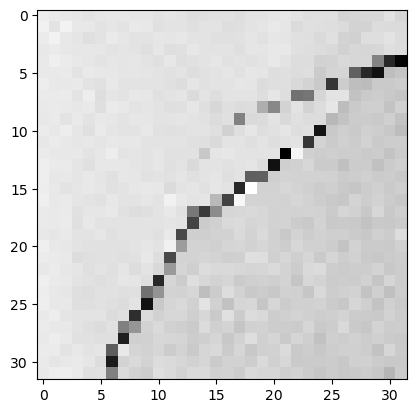

In [14]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the image
random_image_path2 = "C:/Users/USER/Desktop/CRACK_DETECTION/istockphoto-1080117220-612x612_2.jpg"
img = cv2.imread(random_image_path2)

# Convert the image to grayscale (LeNet typically uses grayscale)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Resize the image to 32x32, which is the required input size for LeNet
img_resized = cv2.resize(img_gray, (32, 32))

# Normalize the image (LeNet doesn't require much normalization, but we scale it to 0-1 range)
img_resized = img_resized.astype('float32') / 255.0

# Add an extra batch dimension (as the model expects a batch of images)
img_resized = np.expand_dims(img_resized, axis=0)

# Add a channel dimension (LeNet expects 1 channel for grayscale images)
img_resized = np.expand_dims(img_resized, axis=-1)

# At this point, img_resized is ready to be passed into the LeNet model

# If you want to see the image
plt.imshow(img_resized[0].reshape(32, 32), cmap='gray')
plt.show()


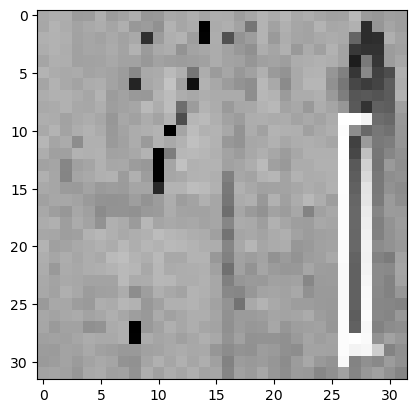

In [15]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the image
random_image_path = "C:/Users/USER/Desktop/CRACK_DETECTION/istockphoto-1080117220-612x612.jpg"
img = cv2.imread(random_image_path)

# Convert the image to grayscale (LeNet typically uses grayscale)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Resize the image to 32x32, which is the required input size for LeNet
img_resized = cv2.resize(img_gray, (32, 32))

# Normalize the image (LeNet doesn't require much normalization, but we scale it to 0-1 range)
img_resized = img_resized.astype('float32') / 255.0

# Add an extra batch dimension (as the model expects a batch of images)
img_resized = np.expand_dims(img_resized, axis=0)

# Add a channel dimension (LeNet expects 1 channel for grayscale images)
img_resized = np.expand_dims(img_resized, axis=-1)

# At this point, img_resized is ready to be passed into the LeNet model

# If you want to see the image
plt.imshow(img_resized[0].reshape(32, 32), cmap='gray')
plt.show()
